In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
T0 = 10
T1 = 3  #bottom
T2 = 67  #left
T3 = 82 #top
T4 = 40  #right
# you can set any values for T0,..,T4
# these values are just taken for example

In [6]:
delx = 0.05
dely = 0.05
delt = 0.005
ceta = 0.000001

In [74]:
beta1 = 0.0005
k0 = 1
c0 = 1
arr1 = np.ones((20,20))
arr1 = arr1*T0
res1 = np.ones(0)
edge_bottom1 = np.ones(0)
edge_left1 = np.ones(0)
edge_top1 = np.ones(0)
edge_right1 = np.ones(0)
# arr1 is the temperture arr1 of object
# each sell repres1ent temperature of (i,j) part
for t in range(20000):
  res1 = np.append(res1, arr1[10][10])
  edge_bottom1 = np.append(edge_bottom1, arr1[0][10])
  edge_left1 = np.append(edge_left1, arr1[10][0])
  edge_top1 = np.append(edge_top1, arr1[19][10])
  edge_right1 = np.append(edge_right1, arr1[10][19])
  for i in range(20):
      for j in range(20):
          qi_1j=1
          qiP1j=1
          qij_1=1
          qijP1=1
          lambdaij = k0*(1+beta1*arr1[i][j])
          r = 1/(lambdaij*delx)
          lambdai_1j=1
          lambdaiP1j=1
          ki_1j=1
          kiP1j=1
          if i>0:
            lambdai_1j = k0*(1+beta1*arr1[i-1][j])
            ki_1j = dely/(delx/(2*lambdai_1j) + delx/(2*lambdaij) + r)
            qi_1j = ki_1j*(arr1[i-1][j] - arr1[i][j])
          elif i==0:
            # bottom
            ki_1j = dely/(delx/(2*lambdaij) + r)
            qi_1j = ki_1j*(T1 - arr1[i][j])
          if i<19:
            # top
            lambdaiP1j = k0*(1+beta1*arr1[i+1][j])
            kiP1j = dely/(delx/(2*lambdaiP1j) + delx/(2*lambdaij) + r)
            qiP1j = kiP1j*(arr1[i][j] - arr1[i+1][j])
          elif i==19:
            kiP1j = dely/(delx/(2*lambdaij) + r)
            qiP1j = kiP1j*(arr1[i][j]-T3)

          lambdaij_1=1
          lambdaijP1=1
          kij_1=1
          kijP1=1
          if j>0:
            lambdaij_1 = k0*(1+beta1*arr1[i][j-1])
            kij_1 = delx/(dely/(2*lambdaij_1) + dely/(2*lambdaij) + r)
            qij_1 = kij_1*(arr1[i][j-1] - arr1[i][j])
          elif j==0:
            # left
            kij_1 = delx/(dely/(2*lambdaij) + r)
            qij_1 = kij_1*(T2 - arr1[i][j])
          if j<19:
            lambdaijP1 = k0*(1+beta1*arr1[i][j+1])
            kijP1 = delx/(dely/(2*lambdaijP1) + dely/(2*lambdaij) + r)
            qijP1 = kijP1*(arr1[i][j] - arr1[i][j+1])
          elif j==19:
            # right
            kijP1 = delx/(dely/(2*lambdaij) + r)
            qijP1 = kiP1j*(arr1[i][j]-T4)

          netq = qi_1j-qiP1j+qij_1-qijP1
          # if i==5 and j==5:
            # print(arr1[i][j], arr1[i+1][j], arr1[i-1][j], arr1[i][j-1], arr1[i][j+1] , sep=' ')
            # print(arr1[i][j])
          heat_gen = netq*netq*delx/(r*delt)
          cij = c0*(1+ceta*arr1[i][j])*(1+ceta*arr1[i][j])
          arr1[i][j] = arr1[i][j] + delt*(netq + heat_gen*(delx*dely))/(cij*delx*dely)

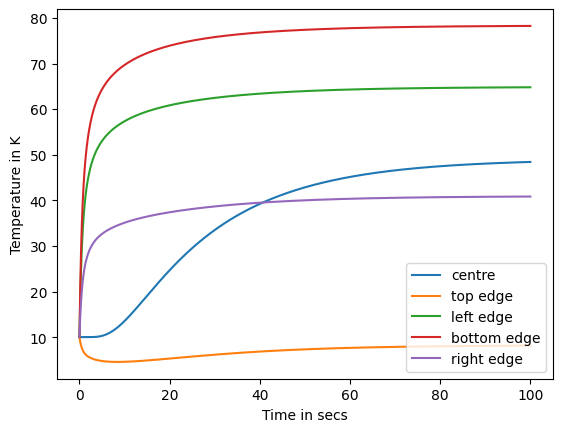

In [75]:
time_points = np.arange(0,20000)*(delt)
plt.plot(time_points, res1, label='centre')
plt.plot(time_points, edge_bottom1, label='bottom edge')
plt.plot(time_points, edge_left1, label='left edge')
plt.plot(time_points, edge_top1, label='top edge')
plt.plot(time_points, edge_right1, label='right edge')
plt.ylabel("Temperature in K")
plt.xlabel("Time in secs")
plt.legend()
plt.show()

In [76]:
beta2 = 0.01
k0 = 1
c0 = 1
arr2 = np.ones((20,20))
arr2 = arr2*T0
res2 = np.ones(0)
# delt = delt/10
# arr2 is the temperture arr1 of object
# each sell repres2ent temperature of (i,j) part
for t in range(20000):
  res2 = np.append(res2, arr2[10][10])
  for i in range(20):
      for j in range(20):
          qi_1j=1
          qiP1j=1
          qij_1=1
          qijP1=1
          lambdaij = k0*(1+beta2*arr2[i][j])
          r = 1/(lambdaij*delx)
          lambdai_1j=1
          lambdaiP1j=1
          ki_1j=1
          kiP1j=1
          if i>0:
            lambdai_1j = k0*(1+beta2*arr2[i-1][j])
            ki_1j = dely/(delx/(2*lambdai_1j) + delx/(2*lambdaij) + r)
            qi_1j = ki_1j*(arr2[i-1][j] - arr2[i][j])
          elif i==0:
            ki_1j = dely/(delx/(2*lambdaij) + r)
            qi_1j = ki_1j*(T1 - arr2[i][j])
          if i<19:
            lambdaiP1j = k0*(1+beta2*arr2[i+1][j])
            kiP1j = dely/(delx/(2*lambdaiP1j) + delx/(2*lambdaij) + r)
            qiP1j = kiP1j*(arr2[i][j] - arr2[i+1][j])
          elif i==19:
            kiP1j = dely/(delx/(2*lambdaij) + r)
            qiP1j = kiP1j*(arr2[i][j]-T3)

          lambdaij_1=1
          lambdaijP1=1
          kij_1=1
          kijP1=1
          if j>0:
            lambdaij_1 = k0*(1+beta2*arr2[i][j-1])
            kij_1 = delx/(dely/(2*lambdaij_1) + dely/(2*lambdaij) + r)
            qij_1 = kij_1*(arr2[i][j-1] - arr2[i][j])
          elif j==0:
            kij_1 = delx/(dely/(2*lambdaij) + r)
            qij_1 = kij_1*(T2 - arr2[i][j])
          if j<19:
            lambdaijP1 = k0*(1+beta2*arr2[i][j+1])
            kijP1 = delx/(dely/(2*lambdaijP1) + dely/(2*lambdaij) + r)
            qijP1 = kijP1*(arr2[i][j] - arr2[i][j+1])
          elif j==19:
            kijP1 = delx/(dely/(2*lambdaij) + r)
            qijP1 = kiP1j*(arr2[i][j]-T4)

          netq = qi_1j-qiP1j+qij_1-qijP1
          # if i==5 and j==5:
            # print(arr2[i][j], arr2[i+1][j], arr2[i-1][j], arr2[i][j-1], arr2[i][j+1] , sep=' ')
            # print(arr2[i][j])
          heat_gen = netq*netq*delx/(r*delt)
          cij = c0*(1+ceta*arr2[i][j])*(1+ceta*arr2[i][j])
          arr2[i][j] = arr2[i][j] + delt*(netq + heat_gen*(delx*dely))/(cij*delx*dely)

In [77]:
beta3 = 0
ceta = 0
k0 = 1
c0 = 1
arr3 = np.ones((20,20))
arr3 = arr3*T0
res3 = np.ones(0)
# arr3 is the temperture arr1 of object
# each sell repres3ent temperature of (i,j) part
for t in range(20000):
  res3 = np.append(res3, arr3[10][10])
  for i in range(20):
      for j in range(20):
          qi_1j=1
          qiP1j=1
          qij_1=1
          qijP1=1
          lambdaij = k0*(1+beta3*arr3[i][j])
          r = 1/(lambdaij*delx)
          lambdai_1j=1
          lambdaiP1j=1
          ki_1j=1
          kiP1j=1
          if i>0:
            lambdai_1j = k0*(1+beta3*arr3[i-1][j])
            ki_1j = dely/(delx/(2*lambdai_1j) + delx/(2*lambdaij) + r)
            qi_1j = ki_1j*(arr3[i-1][j] - arr3[i][j])
          elif i==0:
            ki_1j = dely/(delx/(2*lambdaij) + r)
            qi_1j = ki_1j*(T1 - arr3[i][j])
          if i<19:
            lambdaiP1j = k0*(1+beta3*arr3[i+1][j])
            kiP1j = dely/(delx/(2*lambdaiP1j) + delx/(2*lambdaij) + r)
            qiP1j = kiP1j*(arr3[i][j] - arr3[i+1][j])
          elif i==19:
            kiP1j = dely/(delx/(2*lambdaij) + r)
            qiP1j = kiP1j*(arr3[i][j]-T3)

          lambdaij_1=1
          lambdaijP1=1
          kij_1=1
          kijP1=1
          if j>0:
            lambdaij_1 = k0*(1+beta3*arr3[i][j-1])
            kij_1 = delx/(dely/(2*lambdaij_1) + dely/(2*lambdaij) + r)
            qij_1 = kij_1*(arr3[i][j-1] - arr3[i][j])
          elif j==0:
            kij_1 = delx/(dely/(2*lambdaij) + r)
            qij_1 = kij_1*(T2 - arr3[i][j])
          if j<19:
            lambdaijP1 = k0*(1+beta3*arr3[i][j+1])
            kijP1 = delx/(dely/(2*lambdaijP1) + dely/(2*lambdaij) + r)
            qijP1 = kijP1*(arr3[i][j] - arr3[i][j+1])
          elif j==19:
            kijP1 = delx/(dely/(2*lambdaij) + r)
            qijP1 = kiP1j*(arr3[i][j]-T4)

          netq = qi_1j-qiP1j+qij_1-qijP1
          # if i==5 and j==5:
            # print(arr3[i][j], arr3[i+1][j], arr3[i-1][j], arr3[i][j-1], arr3[i][j+1] , sep=' ')
            # print(arr3[i][j])
          heat_gen = netq*netq*delx/(r*delt)
          cij = c0*(1+ceta*arr1[i][j])*(1+ceta*arr1[i][j])
          arr3[i][j] = arr3[i][j] + delt*(netq + heat_gen*(delx*dely))/(cij*delx*dely)

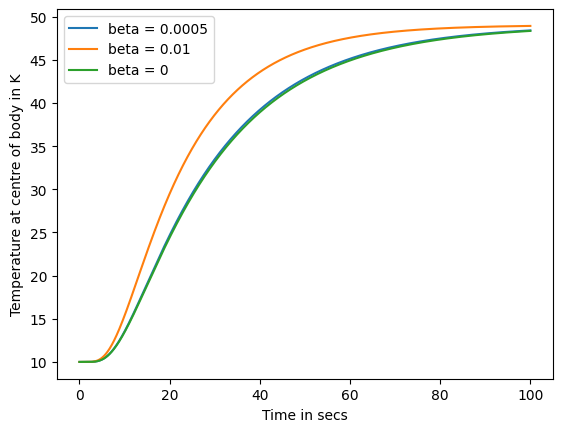

In [78]:
time_points = np.arange(0,20000)*(delt)
plt.plot(time_points, res1, label="beta = "+str(beta1))
plt.plot(time_points, res2, label="beta = "+str(beta2))
plt.plot(time_points, res3, label="beta = "+str(beta3))
plt.ylabel("Temperature at centre of body in K")
plt.xlabel("Time in secs")
plt.legend()
plt.show()

[[35.1154343  22.57288755 16.73842963 13.5984157  11.70958288 10.48064182
   9.63844441  9.04370782  8.62028156  8.3252995   8.13575674  8.04261161
   8.04915363  8.17294654  8.45271113  8.96502592  9.86483417 11.49164753
  14.67772862 21.7405494 ]
 [47.88956982 35.46315069 27.80130634 22.96121439 19.77299883 17.58717638
  16.04138015 14.92759723 14.12327408 13.55604427 13.18576538 12.99597487
  12.99131499 13.20005654 13.68299468 14.55288274 16.0136054  18.43643471
  22.49447093 29.30834211]
 [53.95685083 43.5910127  36.04587661 30.67672804 26.83962946 24.06016935
  22.01951066 20.50979153 19.39731672 18.59817485 18.06362628 17.77236274
  17.72785976 17.96020759 18.53285389 19.5555689  21.20494048 23.74957908
  27.55774099 32.99948524]
 [57.33224761 48.90159704 42.11963314 36.86699181 32.85688708 29.80389977
  27.47729499 25.70614791 24.36998677 23.38795528 22.71045086 22.31396708
  22.19898804 22.3906929  22.94223466 23.93992884 25.50788964 27.80447533
  30.99097883 35.13362978]
 [59

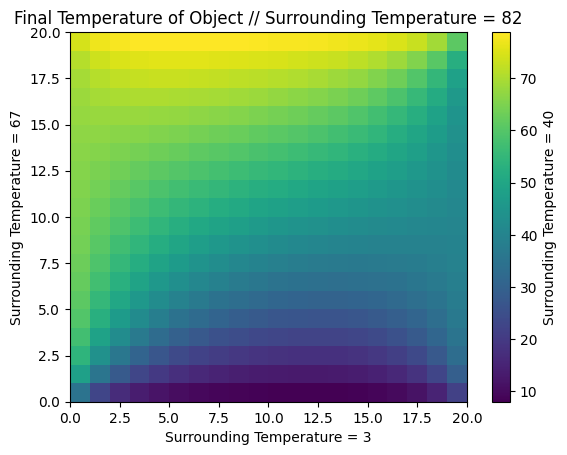

In [79]:
print(arr1)

x, y = np.meshgrid(np.arange(arr1.shape[1] + 1), np.arange(arr1.shape[0] + 1))

plt.pcolormesh(x, y, arr1, cmap='viridis', shading='auto')

plt.title('Final Temperature of Object // Surrounding Temperature = '+str(T3)) 
# plt.title('Surrounding Temperature = '+str(T1))
plt.xlabel('Surrounding Temperature = '+str(T1))
plt.ylabel('Surrounding Temperature = '+str(T2))
plt.colorbar(label='Surrounding Temperature = '+str(T4))

plt.show()


In [80]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(z=arr1, colorscale='Viridis'))
fig.update_layout(
    title='Surrounding Temperature = '+str(T3),
    xaxis_title='Surrounding Temperature = '+str(T1),
    yaxis_title='Surrounding Temperature = '+str(T2),
    coloraxis_colorbar=dict(title='Temperature'),
    coloraxis_colorbar_title = 'Surrounding Temperature = '+str(T4)
)

# Show the plot
fig.show()


In [10]:
# now let us study semi infinite problem
# i am going to plot the state of body in various time points
import plotly.graph_objects as go
T0 = 10
T1 = 50  #bottom
T2 = 50  #left
T3 = 50 #top
T4 = 10 # right end at infinity
delx = 0.05
dely = 0.05
delt = 0.005
ceta = 0.000001
arr = np.ones((20,100))*T0
beta1 = 0.0001
k0 = 1
c0=1

for t in range(2000):
  if t%100==0:
    fig = go.Figure(data=go.Heatmap(z=arr, colorscale='Viridis'))
    fig.update_layout(
        title='Time Point='+str(t)+'//Surrounding Temperature = '+str(T3),
        xaxis_title='Surrounding Temperature = '+str(T1),
        yaxis_title='Surrounding Temperature = '+str(T2),
        coloraxis_colorbar=dict(title='Temperature'),
    )
    fig.show()  

  for i in range(20):
      for j in range(100):
          qi_1j=1
          qiP1j=1
          qij_1=1
          qijP1=1
          lambdaij = k0*(1+beta1*arr[i][j])
          r = 1/(lambdaij*delx)
          lambdai_1j=1
          lambdaiP1j=1
          ki_1j=1
          kiP1j=1
          if i>0:
            lambdai_1j = k0*(1+beta1*arr[i-1][j])
            ki_1j = dely/(delx/(2*lambdai_1j) + delx/(2*lambdaij) + r)
            qi_1j = ki_1j*(arr[i-1][j] - arr[i][j])
          elif i==0:
            # bottom
            ki_1j = dely/(delx/(2*lambdaij) + r)
            qi_1j = ki_1j*(T1 - arr[i][j])
          if i<19:
            # top
            lambdaiP1j = k0*(1+beta1*arr[i+1][j])
            kiP1j = dely/(delx/(2*lambdaiP1j) + delx/(2*lambdaij) + r)
            qiP1j = kiP1j*(arr[i][j] - arr[i+1][j])
          elif i==19:
            kiP1j = dely/(delx/(2*lambdaij) + r)
            qiP1j = kiP1j*(arr[i][j]-T3)

          lambdaij_1=1
          lambdaijP1=1
          kij_1=1
          kijP1=1
          if j>0:
            lambdaij_1 = k0*(1+beta1*arr[i][j-1])
            kij_1 = delx/(dely/(2*lambdaij_1) + dely/(2*lambdaij) + r)
            qij_1 = kij_1*(arr[i][j-1] - arr[i][j])
          elif j==0:
            # left
            kij_1 = delx/(dely/(2*lambdaij) + r)
            qij_1 = kij_1*(T2 - arr[i][j])
          if j<99:
            lambdaijP1 = k0*(1+beta1*arr[i][j+1])
            kijP1 = delx/(dely/(2*lambdaijP1) + dely/(2*lambdaij) + r)
            qijP1 = kijP1*(arr[i][j] - arr[i][j+1])
            # qijP1 = qij_1
          elif j==99:
            # right
            kijP1 = delx/(dely/(2*lambdaij) + r)
            qijP1 = kiP1j*(arr[i][j]-T4)
            # qijP1 = qij_1

          netq = qi_1j-qiP1j-qijP1+qij_1
          # if i==5 and j==5:
            # print(arr[i][j], arr[i+1][j], arr[i-1][j], arr[i][j-1], arr[i][j+1] , sep=' ')
            # print(arr[i][j])
          heat_gen = netq*netq*delx/(r*delt)
          cij = c0*(1+ceta*arr[i][j])*(1+ceta*arr[i][j])
          arr[i][j] = arr[i][j] + delt*(netq + heat_gen*(delx*dely))/(cij*delx*dely)
